# 1. Import

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Read data

In [9]:
noc_region_df = pd.read_csv("./Data/noc_regions.csv")
athlete_events_df = pd.read_csv("./Data/athlete_events.csv")

# 3. Merge data

In [10]:
df = pd.merge(athlete_events_df, noc_region_df)
df = df.rename(columns={'region':'Region', 'notes':'Notes'})
print("All duplicated values: ", str(df.duplicated().sum()))
df = df.drop_duplicates()

All duplicated values:  1385


# 4. Fill Null

In [11]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9303
Height     58726
Weight     61437
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229619
Region        21
Notes     264347
dtype: int64

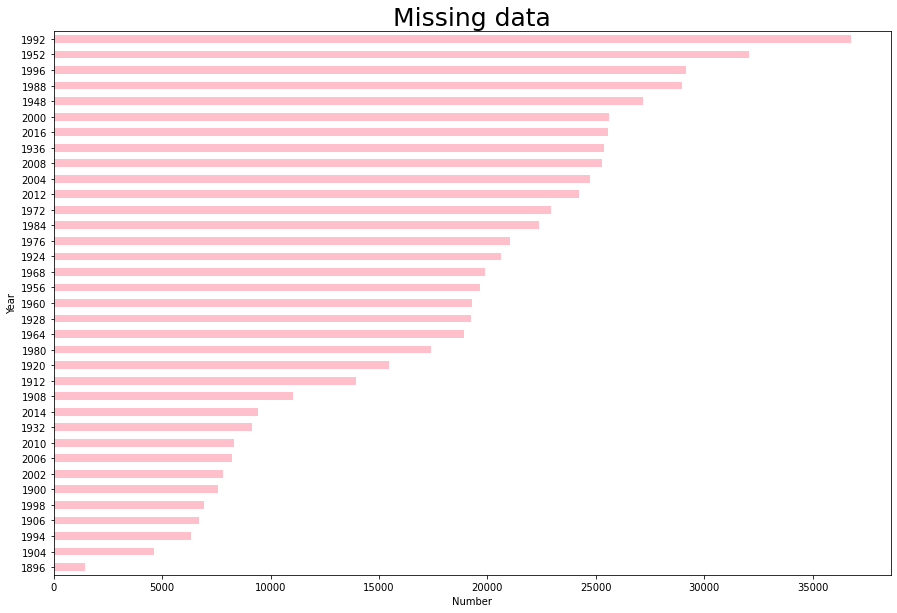

In [18]:
df["miss_data"] = df.isnull().sum(1)
n_miss_data=df.groupby(['Year'])['miss_data'].sum().sort_values(ascending=True)
plt.figure(figsize=(15,10))
plt.title("Missing data", size=25)
plt.xlabel("Number")
n_miss_data.plot(kind='barh', color='pink')

In [19]:
# ------- Fill by mean() ----- #
df['Age'].fillna((df['Age'].mean()),inplace=True)
df['Height'].fillna((df['Height'].mean()),inplace=True)
df['Weight'].fillna((df['Weight'].mean()),inplace=True)

# --------- Normal fill ------- #
df['Region'].fillna(df['Team'],inplace=True)
df['Notes'].fillna('No Notes',inplace=True)
df['Medal'].fillna('No Medal',inplace =True)

# 5. View

In [20]:
df.isnull().sum() #no missing data

ID           0
Name         0
Sex          0
Age          0
Height       0
Weight       0
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
Region       0
Notes        0
miss_data    0
dtype: int64

In [21]:
althetes_count = len(df.ID)
print('Total number of althetes in olymics:', althetes_count)

Total number of althetes in olymics: 269382


In [22]:
df.to_csv('Data/final_data.csv', index=False)